In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Configurações matplotlib e seaborn
plt.rcParams['figure.figsize'] = (16,10)
plt.style.use('seaborn-darkgrid')

# Avisos
import warnings
warnings.filterwarnings('ignore')

# Exploração e manipulação dos dados

In [2]:
df = pd.read_csv('house_data.csv')

In [3]:
df.shape

(10692, 13)

In [4]:
df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


In [6]:
df.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


In [7]:
df.nunique()

city                      5
area                    517
rooms                    11
bathroom                 10
parking spaces           11
floor                    35
animal                    2
furniture                 2
hoa (R$)               1679
rent amount (R$)       1195
property tax (R$)      1243
fire insurance (R$)     216
total (R$)             5751
dtype: int64

In [8]:
# Removendo as colunas "fire insurance" e "total" pois na entrada de dados para prever o valor do aluguel será dificil para o osuário obter essa informação
df.drop(columns= ['fire insurance (R$)','total (R$)'], inplace = True)

In [9]:
#Filtrando tipos de colunas
df_numericas = df[['area','rooms','bathroom','parking spaces','hoa (R$)','rent amount (R$)','property tax (R$)']]
df_categoricas = df.drop(columns = df_numericas.columns)

### Análise dos campos categóricos

In [10]:
for i in df_categoricas.columns:
    print(df_categoricas[i].value_counts(normalize = True) * 100)

São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: city, dtype: float64
-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: floor, dtype: float64
acept        77.777778
not acept    22.222222
Name: animal, dtype: float64
not furnished    75.626637
furnished        24.373363
Name: furniture, dtype: float64


In [11]:
# Foi identificado andar de numero 301 na coluna "floor" essa informação está errada provavelmente por um erro de digitação. Portanto assumimos que a intenção seria digitar andar de nº 30.
df['floor'].replace('301','30', inplace = True)

In [12]:
# Ainda na coluna "floor" existem valores "-" que provavelmente correspondem a andar 0, ou casas. Portanto esses valores serão substituídos por 0
df['floor'].replace('-','0', inplace = True)

In [13]:
# Transformando a coluna floor em dados numéricos
df['floor'] = pd.to_numeric(df['floor'])

### Análise dos campos numéricos

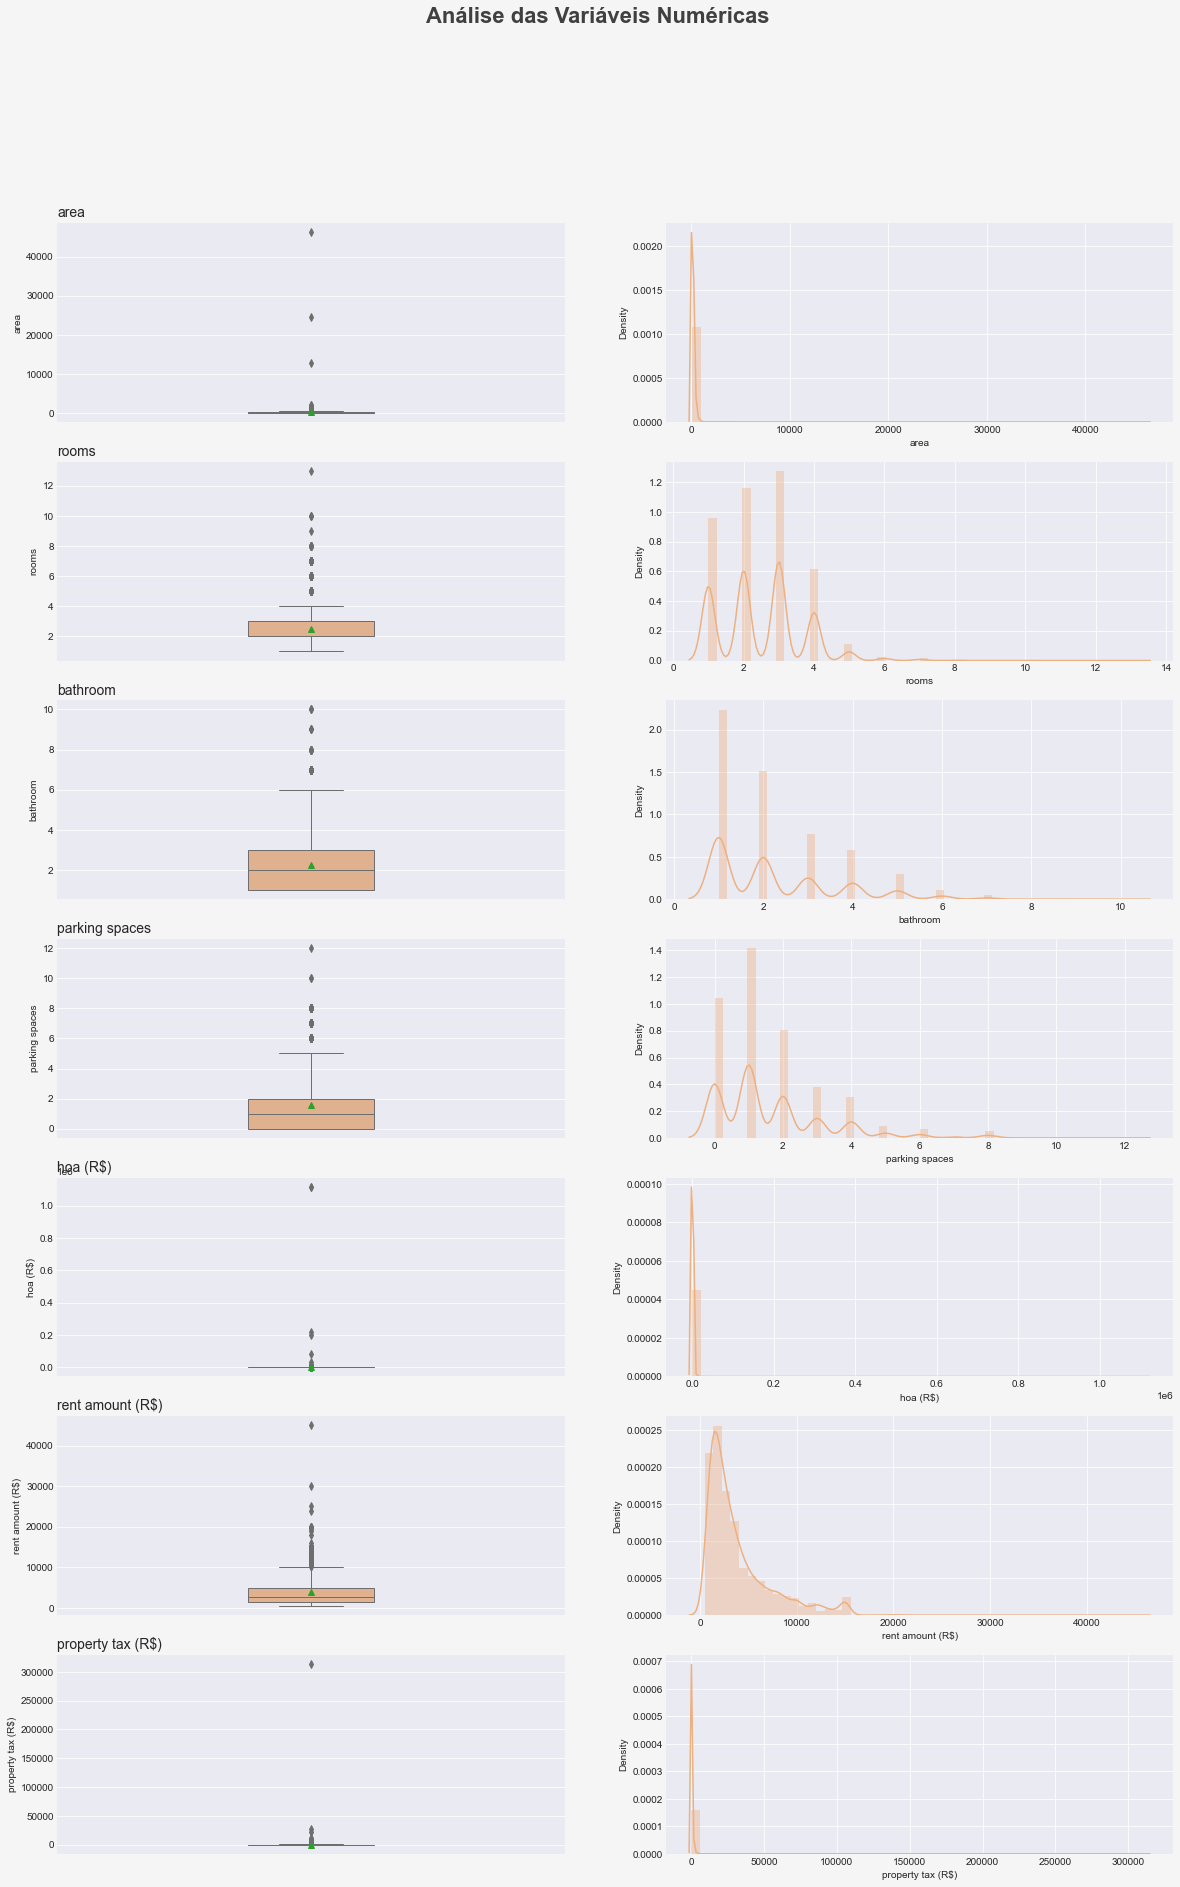

In [14]:
# Grid - gráficos

# Tamanho
Figura, Eixo = plt.subplots(figsize=(20, 30))

#Cor de fundo
cor_fundo = '#f5f5f5'
Figura.set_facecolor(cor_fundo)

#Paleta de cores
paleta_cores = sns.color_palette('flare', len(df_numericas) * 2)

#Título
plt.suptitle('Análise das Variáveis Numéricas', fontsize=22, color='#404040', fontweight=600)

#Estrutura
linhas = 7 # Todas as infos numéricas
colunas = 2 # Boxplot distplot
posicao = 1 # Posição inicial do grid

# Loop para plotar os gráficos
for coluna in df_numericas:
    # Plot no Grid -- Boxplot
    plt.subplot(linhas, colunas, posicao)
    # Título
    plt.title(f'{coluna}',loc='left',fontsize=14, fontweight=200)
    # Plot
    sns.boxplot (data = df_numericas, y = coluna, showmeans = True, saturation = 0.75, linewidth = 1, 
                 color = paleta_cores[posicao], width = 0.25)
    # Mudar
    posicao += 1
    
    # Plot no Grid -- Distplot
    plt.subplot(linhas, colunas, posicao)
    
    #Titulo
    sns.distplot(df_numericas[coluna], color=paleta_cores[ posicao - 1 ] )
    
    #Mudar
    posicao += 1

In [15]:
# Análise outliers area
df.loc[df['area'] > 1500]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
654,São Paulo,1600,6,6,6,0,acept,furnished,0,7600,1834
2397,Belo Horizonte,46335,4,8,5,11,acept,furnished,960,8500,646
4813,São Paulo,1600,4,5,12,0,acept,not furnished,1,6900,5000
5129,Belo Horizonte,2000,4,2,3,0,acept,not furnished,0,4956,200
5915,São Paulo,24606,5,4,4,12,acept,not furnished,2254,8100,7859
8790,Belo Horizonte,2000,3,3,2,2,acept,furnished,3000,5000,200
9241,Campinas,12732,3,2,0,3,acept,not furnished,700,1600,96


In [16]:
# Eliminando outliers de area acima de 1500 m2
df = df.loc[df['area'] < 1500]

In [17]:
# Análise outliers hoa (condomínio)
df.loc[df['hoa (R$)'] > 10000].sort_values('hoa (R$)',ascending = False)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
255,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64
6979,Belo Horizonte,155,1,4,0,4,not acept,not furnished,1117000,2790,64
6230,São Paulo,340,5,4,2,7,acept,not furnished,220000,12000,1000
2859,São Paulo,285,4,5,4,6,acept,furnished,200000,20000,1834
2928,Rio de Janeiro,35,1,1,0,1,acept,furnished,81150,4500,9900
1444,Porto Alegre,42,1,1,0,10,acept,not furnished,32000,700,40
1213,São Paulo,850,6,7,4,0,not acept,not furnished,15000,13000,2465
415,São Paulo,488,4,3,3,0,acept,not furnished,14130,6400,1214
5293,São Paulo,850,5,7,8,1,not acept,not furnished,14000,4000,0


In [18]:
# Os dados de condomínio acima de 10000 serão excluídos
df = df.loc[df['hoa (R$)'] < 10000]

In [19]:
# Análise outliers rent amount
df.loc[df['rent amount (R$)'] > 15000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
157,São Paulo,660,4,5,5,12,acept,furnished,4800,20000,1750
1253,São Paulo,315,3,5,2,14,not acept,not furnished,4300,20000,959
1743,São Paulo,410,4,5,5,1,acept,not furnished,0,20000,0
2182,São Paulo,700,4,7,8,0,acept,not furnished,0,45000,8750
2521,Porto Alegre,318,4,3,0,0,acept,not furnished,0,19000,384
2619,São Paulo,80,2,1,1,1,acept,not furnished,875,24000,0
5525,São Paulo,900,3,4,8,0,acept,not furnished,0,20000,3813
5741,São Paulo,303,3,4,4,1,acept,furnished,4540,18000,0
6118,São Paulo,240,4,4,4,5,acept,not furnished,2700,16000,1667
6185,São Paulo,455,4,5,4,5,acept,not furnished,8500,19500,3334


In [20]:
# Eliminando outliers com valor de aluguel acima de R$ 15000,00
df = df[df['rent amount (R$)'] < 15000]

In [21]:
# Análise outliers property tax
df.loc[df['property tax (R$)'] > 10000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
1699,São Paulo,700,4,4,4,0,acept,not furnished,0,10000,21880
5331,São Paulo,300,4,5,5,6,not acept,not furnished,3500,1990,10830
6243,Rio de Janeiro,95,2,2,1,11,acept,not furnished,1024,3000,28120
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700
10172,Belo Horizonte,260,4,4,6,10,acept,furnished,3200,11900,12500


In [22]:
# Eliminando dados com proprty tax acima de R$ 10000,00
df = df.loc[df['property tax (R$)'] < 10000]

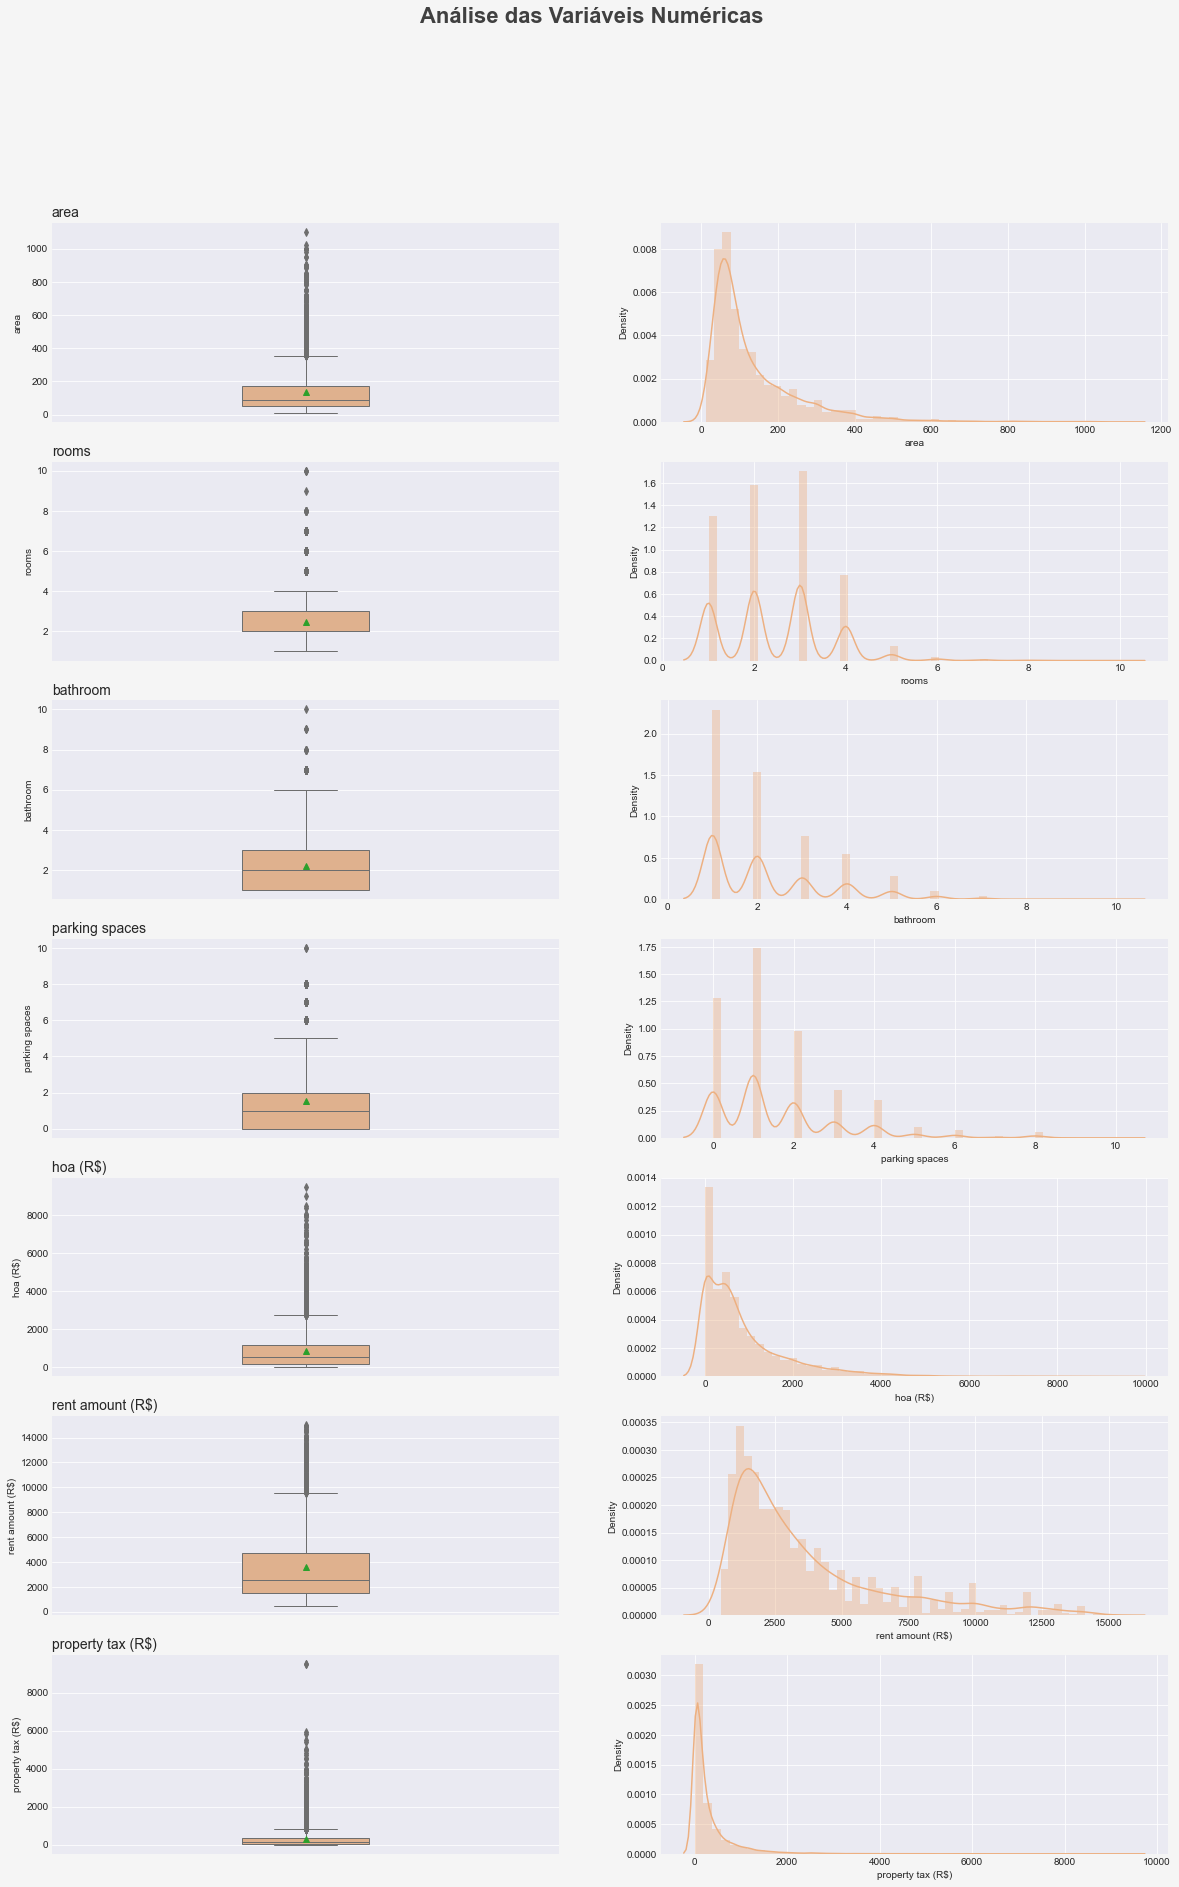

In [23]:
df_numericas = df[['area','rooms','bathroom','parking spaces','hoa (R$)','rent amount (R$)','property tax (R$)']]
df_categoricas = df.drop(columns = df_numericas.columns)

# Grid - gráficos

# Tamanho
Figura, Eixo = plt.subplots(figsize=(20, 30))

#Cor de fundo
cor_fundo = '#f5f5f5'
Figura.set_facecolor(cor_fundo)

#Paleta de cores
paleta_cores = sns.color_palette('flare', len(df_numericas) * 2)

#Título
plt.suptitle('Análise das Variáveis Numéricas', fontsize=22, color='#404040', fontweight=600)

#Estrutura
linhas = 7 # Todas as infos numéricas
colunas = 2 # Boxplot distplot
posicao = 1 # Posição inicial do grid

# Loop para plotar os gráficos
for coluna in df_numericas:
    # Plot no Grid -- Boxplot
    plt.subplot(linhas, colunas, posicao)
    # Título
    plt.title(f'{coluna}',loc='left',fontsize=14, fontweight=200)
    # Plot
    sns.boxplot (data = df_numericas, y = coluna, showmeans = True, saturation = 0.75, linewidth = 1, 
                 color = paleta_cores[posicao], width = 0.25)
    # Mudar
    posicao += 1
    
    # Plot no Grid -- Distplot
    plt.subplot(linhas, colunas, posicao)
    
    #Titulo
    sns.distplot(df_numericas[coluna], color=paleta_cores[ posicao - 1 ] )
    
    #Mudar
    posicao += 1

# Engenharia de features

In [24]:
# Ajuste de colunas categóricas
df['animal'] = df['animal'].map({'acept':1, 'not acept':0})
df['furniture'] = df['furniture'].map({'furnished':1, 'not furnished':0})

# Filtrar cidade de São Paulo
df_SP = df.loc[df['city'] == 'São Paulo']
df_SP.drop(columns = ['city'], inplace = True)

In [25]:
# Separando features da variável target
X = df_SP.drop(columns = ['rent amount (R$)'])
y = df_SP['rent amount (R$)']

<AxesSubplot:>

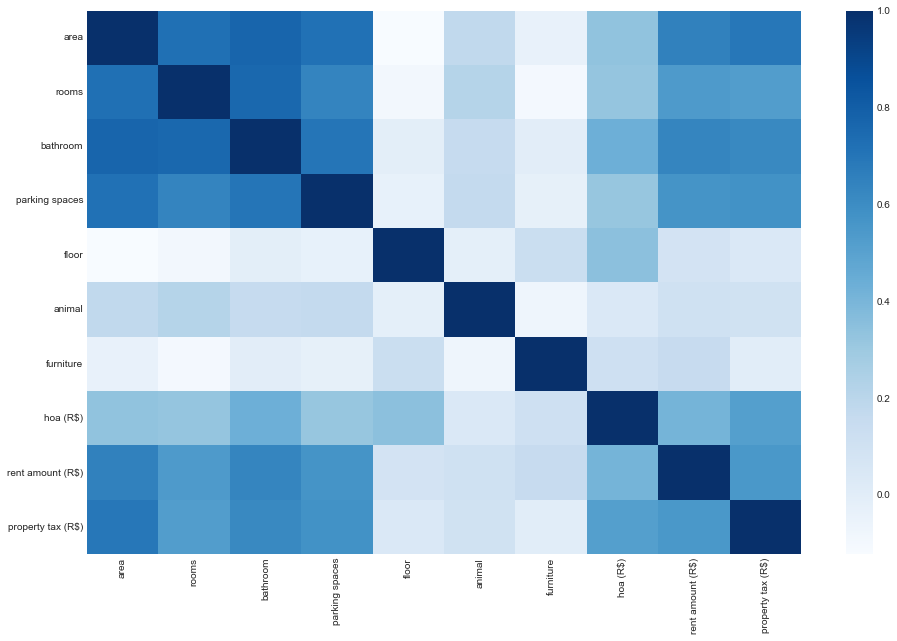

In [26]:
# Correlation heatmap
plt.rcParams['figure.figsize'] = (16,10)
sns.heatmap (df_SP.corr(), cmap='Blues')

In [27]:
# Separa variáveis de treino e de teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [28]:
# Features mais relevantes
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

# Selecao de features
def Selecao_Features( X_train, y_train ):

  # Configurar para selecionar as features
  Selecao = SelectKBest( score_func = mutual_info_regression, k= 'all' )

  # Fitar o aprendizado
  Selecao.fit( X_train, y_train )

  return Selecao

# Aplicar essa função
Scores = Selecao_Features( X_train, y_train )

# Analisar
for Posicao, Score in enumerate( Scores.scores_ ):
  print( f' { X_train.columns[Posicao] } : {Score}' )

# Todas as features possuem um nível de relevância para o resultado, portanto nenhuma será excluída do modelo

 area : 0.27908515206848783
 rooms : 0.2368720591792579
 bathroom : 0.30095754849531
 parking spaces : 0.21726974890633866
 floor : 0.05134630575598953
 animal : 0.004097500385622066
 furniture : 0.029717168652062753
 hoa (R$) : 0.15031207219240228
 property tax (R$) : 0.15986766317030687


# Construção do modelo

In [29]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()

# Aplicando GridSearch Para otimizar parâmetros
max_depth= [4,5]
min_samples_split= [2,3,4,5]
min_samples_leaf= [1,2,3,4,5]

parametros = {'max_depth' : max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf' : min_samples_leaf}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator = modelo, param_grid = parametros, scoring = "neg_mean_squared_error", cv = 10)

In [30]:
grid = grid.fit(X_train, y_train)

In [31]:
grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}

In [32]:
# Costrução do modelo com parâmetros definidos pelo grid
rfr = RandomForestRegressor(max_depth = 5, min_samples_leaf = 4, min_samples_split = 4)
# Treinamento do modelo
modelo = rfr.fit(X_train, y_train)

In [33]:
# Predição dos dados de teste
pred = modelo.predict(X_test)
# Score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)
print("MSE: ", sqrt(mse), "R2: ", r2)


MSE:  2042.8999217577073 R2:  0.5704636257159048


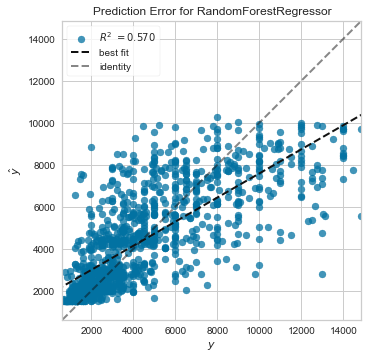

In [34]:
# Avaliando o modelo graficamente
from yellowbrick.regressor import PredictionError

# Instanciar
modelo = RandomForestRegressor(max_depth = 5, min_samples_leaf = 4, min_samples_split = 4)
erro = PredictionError(modelo)

erro.fit(X_train, y_train)
erro.score(X_test, y_test)
erro.show();

In [40]:
# Treinando o modelo com todos os dados
rfr = RandomForestRegressor(max_depth = 5, min_samples_leaf = 4, min_samples_split = 4)
modelo = rfr.fit(X.values, y)

# Exportação

In [41]:
import joblib
joblib.dump(modelo, 'random_forest_reg_v1.pkl')

['random_forest_reg_v1.pkl']